In [1]:
from moabb.contexts.ssvep import ExtentedSSVEP
from pyriemann.estimation import Covariances
from pyriemann.spatialfilters import CSP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from pyriemann.classification import TSclassifier, MDM
from sklearn.pipeline import make_pipeline
from collections import OrderedDict
from moabb.datasets.lisv_ssvep import lisvSSVEP
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
sns.set(sns.plotting_context("talk"), 
        palette=sns.color_palette('Blues', n_colors=4),
        style=sns.axes_style("ticks"))

In [ ]:
mean_methods = {'riemann': mean_riemann,
                'logeuclid': mean_logeuclid,
                'euclid': mean_euclid,
                'identity': mean_identity,
                'logdet': mean_logdet,
                'wasserstein': mean_wasserstein,
                'ale': mean_ale,
                'harmonic': mean_harmonic,
                'kullback_sym': mean_kullback_sym}

In [2]:
MDM?

In [5]:
datasets = [lisvSSVEP()]
pipelines = OrderedDict()
# pipelines['MDM'] = make_pipeline(Covariances('shaf'), MDM())
# pipelines['TS'] = make_pipeline(Covariances('shaf'), TSclassifier())
# pipelines['CSP+LDA'] = make_pipeline(Covariances('shaf'), CSP(12), LDA())
pipelines['MDM-AIR'] = make_pipeline(Covariances('shaf'), MDM('riemann'))
pipelines['MDM-LE'] = make_pipeline(Covariances('shaf'), MDM('logeuclid'))
pipelines['MDM-E'] = make_pipeline(Covariances('shaf'), MDM('euclid'))
pipelines['MDM-LD'] = make_pipeline(Covariances('shaf'), MDM('logdet'))
pipelines['MDM-W'] = make_pipeline(Covariances('shaf'), MDM('wasserstein'))
pipelines['MDM-H'] = make_pipeline(Covariances('shaf'), MDM({'mean':'harmonic', 'distance':'euclid'}))
context = ExtentedSSVEP(datasets=datasets, pipelines=pipelines, frequencies=[13.0, 17.0, 21.0])

In [6]:
results = context.evaluate(verbose=True)

32 matching events found
32 matching events found
64 matching events found
[0.734375, 'lisv exoskeleton ssvep', 1, 'MDM-AIR', 0.26024794578552246]
[0.71875, 'lisv exoskeleton ssvep', 1, 'MDM-LE', 0.19354701042175293]
[0.53125, 'lisv exoskeleton ssvep', 1, 'MDM-E', 0.10498309135437012]
[0.25, 'lisv exoskeleton ssvep', 1, 'MDM-LD', 0.12377405166625977]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))


[0.5625, 'lisv exoskeleton ssvep', 1, 'MDM-W', 0.19596600532531738]
[0.484375, 'lisv exoskeleton ssvep', 1, 'MDM-H', 0.10027694702148438]
32 matching events found
32 matching events found
64 matching events found
[0.796875, 'lisv exoskeleton ssvep', 2, 'MDM-AIR', 0.26194000244140625]
[0.78125, 'lisv exoskeleton ssvep', 2, 'MDM-LE', 0.19704127311706543]
[0.4375, 'lisv exoskeleton ssvep', 2, 'MDM-E', 0.10379886627197266]
[0.25, 'lisv exoskeleton ssvep', 2, 'MDM-LD', 0.11776304244995117]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))


[0.5, 'lisv exoskeleton ssvep', 2, 'MDM-W', 0.19963407516479492]
[0.3125, 'lisv exoskeleton ssvep', 2, 'MDM-H', 0.10669994354248047]
32 matching events found
32 matching events found
64 matching events found
[0.859375, 'lisv exoskeleton ssvep', 3, 'MDM-AIR', 0.26264500617980957]
[0.859375, 'lisv exoskeleton ssvep', 3, 'MDM-LE', 0.18858814239501953]
[0.671875, 'lisv exoskeleton ssvep', 3, 'MDM-E', 0.10063004493713379]
[0.25, 'lisv exoskeleton ssvep', 3, 'MDM-LD', 0.11704611778259277]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))


[0.75, 'lisv exoskeleton ssvep', 3, 'MDM-W', 0.2060108184814453]
[0.671875, 'lisv exoskeleton ssvep', 3, 'MDM-H', 0.1060328483581543]
32 matching events found
32 matching events found
64 matching events found
[0.875, 'lisv exoskeleton ssvep', 4, 'MDM-AIR', 0.26302313804626465]
[0.84375, 'lisv exoskeleton ssvep', 4, 'MDM-LE', 0.19564509391784668]
[0.546875, 'lisv exoskeleton ssvep', 4, 'MDM-E', 0.10278201103210449]
[0.25, 'lisv exoskeleton ssvep', 4, 'MDM-LD', 0.12178206443786621]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))


[0.640625, 'lisv exoskeleton ssvep', 4, 'MDM-W', 0.20575165748596191]
[0.421875, 'lisv exoskeleton ssvep', 4, 'MDM-H', 0.10339784622192383]
32 matching events found
32 matching events found
64 matching events found
[0.6875, 'lisv exoskeleton ssvep', 5, 'MDM-AIR', 0.2663438320159912]
[0.625, 'lisv exoskeleton ssvep', 5, 'MDM-LE', 0.1914379596710205]
[0.375, 'lisv exoskeleton ssvep', 5, 'MDM-E', 0.10401678085327148]
[0.25, 'lisv exoskeleton ssvep', 5, 'MDM-LD', 0.11890816688537598]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))


[0.453125, 'lisv exoskeleton ssvep', 5, 'MDM-W', 0.20962786674499512]
[0.265625, 'lisv exoskeleton ssvep', 5, 'MDM-H', 0.11005806922912598]
32 matching events found
32 matching events found
64 matching events found
[0.859375, 'lisv exoskeleton ssvep', 6, 'MDM-AIR', 0.26646900177001953]
[0.84375, 'lisv exoskeleton ssvep', 6, 'MDM-LE', 0.18988418579101562]
[0.34375, 'lisv exoskeleton ssvep', 6, 'MDM-E', 0.10626506805419922]
[0.25, 'lisv exoskeleton ssvep', 6, 'MDM-LD', 0.12288284301757812]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))


[0.53125, 'lisv exoskeleton ssvep', 6, 'MDM-W', 0.19974923133850098]
[0.390625, 'lisv exoskeleton ssvep', 6, 'MDM-H', 0.1038351058959961]
32 matching events found
32 matching events found
32 matching events found
96 matching events found
[0.88541666666666663, 'lisv exoskeleton ssvep', 7, 'MDM-AIR', 0.6476521492004395]
[0.875, 'lisv exoskeleton ssvep', 7, 'MDM-LE', 0.37618398666381836]
[0.60416666666666663, 'lisv exoskeleton ssvep', 7, 'MDM-E', 0.23367691040039062]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))


[0.25, 'lisv exoskeleton ssvep', 7, 'MDM-LD', 0.2674520015716553]
[0.67708333333333337, 'lisv exoskeleton ssvep', 7, 'MDM-W', 0.4174010753631592]
[0.47916666666666669, 'lisv exoskeleton ssvep', 7, 'MDM-H', 0.2425839900970459]
32 matching events found
32 matching events found
32 matching events found
96 matching events found
[0.86458333333333337, 'lisv exoskeleton ssvep', 8, 'MDM-AIR', 0.6134960651397705]
[0.875, 'lisv exoskeleton ssvep', 8, 'MDM-LE', 0.39389896392822266]
[0.66666666666666663, 'lisv exoskeleton ssvep', 8, 'MDM-E', 0.23997282981872559]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))


[0.25, 'lisv exoskeleton ssvep', 8, 'MDM-LD', 0.258533239364624]
[0.77083333333333337, 'lisv exoskeleton ssvep', 8, 'MDM-W', 0.4007391929626465]
[0.64583333333333337, 'lisv exoskeleton ssvep', 8, 'MDM-H', 0.2399308681488037]
32 matching events found
32 matching events found
64 matching events found
[0.703125, 'lisv exoskeleton ssvep', 9, 'MDM-AIR', 0.2665081024169922]
[0.703125, 'lisv exoskeleton ssvep', 9, 'MDM-LE', 0.19578981399536133]
[0.578125, 'lisv exoskeleton ssvep', 9, 'MDM-E', 0.108734130859375]
[0.25, 'lisv exoskeleton ssvep', 9, 'MDM-LD', 0.1205892562866211]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))


[0.59375, 'lisv exoskeleton ssvep', 9, 'MDM-W', 0.1961820125579834]
[0.421875, 'lisv exoskeleton ssvep', 9, 'MDM-H', 0.10324692726135254]
32 matching events found
32 matching events found
32 matching events found
32 matching events found
32 matching events found
32 matching events found
192 matching events found
[0.72916666666666663, 'lisv exoskeleton ssvep', 10, 'MDM-AIR', 2.4420111179351807]
[0.73958333333333337, 'lisv exoskeleton ssvep', 10, 'MDM-LE', 1.2784619331359863]
[0.39583333333333331, 'lisv exoskeleton ssvep', 10, 'MDM-E', 0.9021120071411133]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide b

[0.25, 'lisv exoskeleton ssvep', 10, 'MDM-LD', 0.973010778427124]
[0.48958333333333331, 'lisv exoskeleton ssvep', 10, 'MDM-W', 1.2979319095611572]
[0.375, 'lisv exoskeleton ssvep', 10, 'MDM-H', 0.9160261154174805]
32 matching events found
32 matching events found
32 matching events found
32 matching events found
128 matching events found
[0.6015625, 'lisv exoskeleton ssvep', 11, 'MDM-AIR', 1.0862572193145752]
[0.578125, 'lisv exoskeleton ssvep', 11, 'MDM-LE', 0.6196789741516113]
[0.40625, 'lisv exoskeleton ssvep', 11, 'MDM-E', 0.40420103073120117]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))


[0.25, 'lisv exoskeleton ssvep', 11, 'MDM-LD', 0.43907928466796875]
[0.4140625, 'lisv exoskeleton ssvep', 11, 'MDM-W', 0.6411991119384766]
[0.34375, 'lisv exoskeleton ssvep', 11, 'MDM-H', 0.41489696502685547]
32 matching events found
32 matching events found
32 matching events found
32 matching events found
32 matching events found
160 matching events found
[0.96875, 'lisv exoskeleton ssvep', 12, 'MDM-AIR', 1.6906461715698242]
[0.96250000000000002, 'lisv exoskeleton ssvep', 12, 'MDM-LE', 0.915241003036499]
[0.71250000000000002, 'lisv exoskeleton ssvep', 12, 'MDM-E', 0.6273870468139648]


/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide by zero encountered in log
  numpy.log(numpy.linalg.det(A)*numpy.linalg.det(B)))
/Users/emmanuelkalunga/Documents/School/EEG_covariance_classification/pyRiemann/pyriemann/utils/distance.py:92: RuntimeWarning: divide b

[0.25, 'lisv exoskeleton ssvep', 12, 'MDM-LD', 0.6766548156738281]
[0.81874999999999998, 'lisv exoskeleton ssvep', 12, 'MDM-W', 0.9301199913024902]
[0.53749999999999998, 'lisv exoskeleton ssvep', 12, 'MDM-H', 0.6497108936309814]


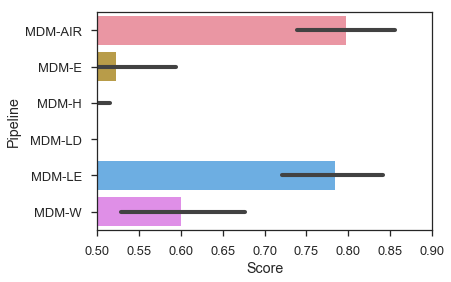

In [11]:
results_pd = pd.concat(results, ignore_index=True)
sns.barplot(y='Pipeline', x='Score', data=results_pd)
plt.xlim(0.5, 0.9);

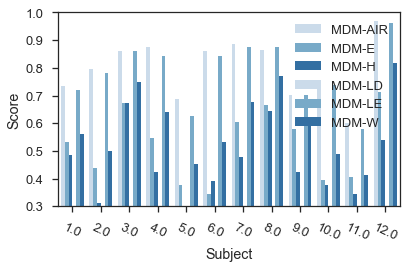

In [12]:
g = sns.barplot(x='Subject', y='Score', data=results_pd, hue='Pipeline', palette=sns.color_palette('Blues', 3))
g.set_ylim(0.3,1)
plt.xticks(rotation=-25)
plt.legend(loc='upper right')
plt.tight_layout()